# Data Science Project
## Data Description:
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

## Attributes Information

Attribute Information:

1. age
2. sex (1=Male, 0 =Female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target class

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
#importing required libraries
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
#checking the retrieved data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
#Getting information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data Preprocessing

### Cleaning the data

In [11]:
# Checking for Null or missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### No missing value found.

### Checking for duplictes Values

In [16]:
#Finding the redundant values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [5]:
# removing the duplicate values. Duplicates produce noise in the data
cleanData = data.drop_duplicates()

In [6]:
cleanData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Performing EDA

In [7]:
#Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Univarite Analysis

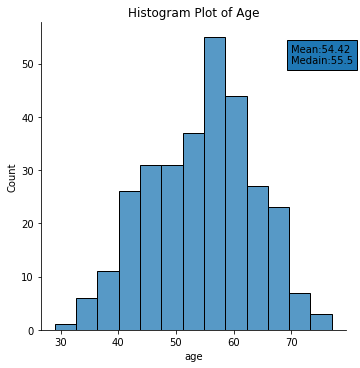

In [24]:
#plot the histogram to see the distribution of the Age point data.
sns.displot(cleanData['age'])
plt.text(70,50,"Mean:"+str(round(cleanData['age'].mean(),2))+"\nMedain:"+str(round(cleanData['age'].median(),2)),bbox={})
plt.title("Histogram Plot of Age")
plt.savefig('Age Histogram-plot.png', dpi=300, bbox_inches='tight')

### Description:
The bell like shape of the histogram shows that the age data points are normally distributed. The Mean is 54.42 and Medain is 55.5 that proves that all the values are normally distributed about the mean. This means that there is no skewness in the data points. The range of Age is around 28 to 75. The maximum people appearing are between the age 55-60.

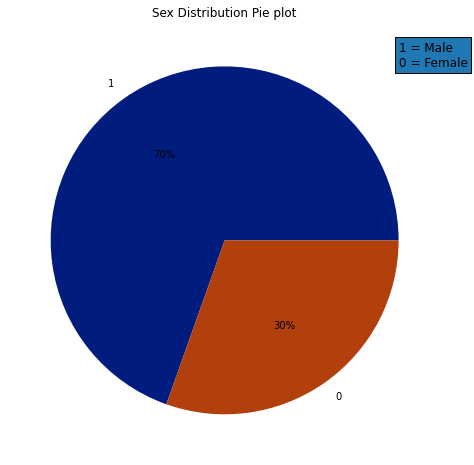

In [30]:
#plotting pie graph
sexClass =dict(data['sex'].sort_values().value_counts())
values = sexClass.values()
keys = sexClass.keys()
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

plt.title("Sex Distribution Pie plot")
plt.text(1,1,"1 = Disea\n0 = Female", fontsize= 12, style='normal', bbox={})

# #defining size of the picture
# plt.rcParams["figure.figsize"] = (30,8)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.savefig('Sex Distribution Pie plot.png',dpi=300,bbox_inches='tight')

### Description:
The pie plot or pie graph shows the sex distribution of the people in the dataset. It reveals that the majority of the people are male. The dataset contains 70% males data and 30% females data.

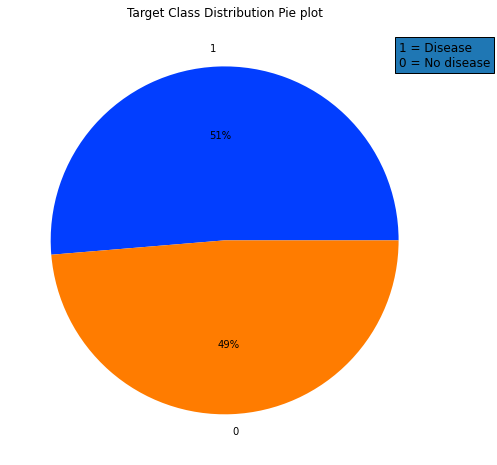

In [32]:
#plotting pie graph
Class =dict(data['target'].sort_values().value_counts())
values = Class.values()
keys = Class.keys()
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

plt.title("Target Class Distribution Pie plot")
plt.text(1,1,"1 = Disease\n0 = No disease", fontsize= 12, style='normal', bbox={})

# #defining size of the picture
# plt.rcParams["figure.figsize"] = (30,8)

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.savefig('Sex Distribution Pie plot.png',dpi=300,bbox_inches='tight')

### Description:
The pie plot or pie graph shows the target class distribution of the people in the dataset. It reflects that the dataset is normally distributed. There is no biasness in the dataset. The dataset contains 51% data of the people that have heart disease and 49% data of the people that have no heart disease.

### Bivariate Analysis
#### Analyzing relationship of varibales with eachother

In [52]:
#Analyzing relationship of varibales with eachother
correlation = cleanData.corr() #returns the correlation cofficeient against each varibale with each other varibale
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [46]:
min(list(correlation.min()))

-0.5763143815309939

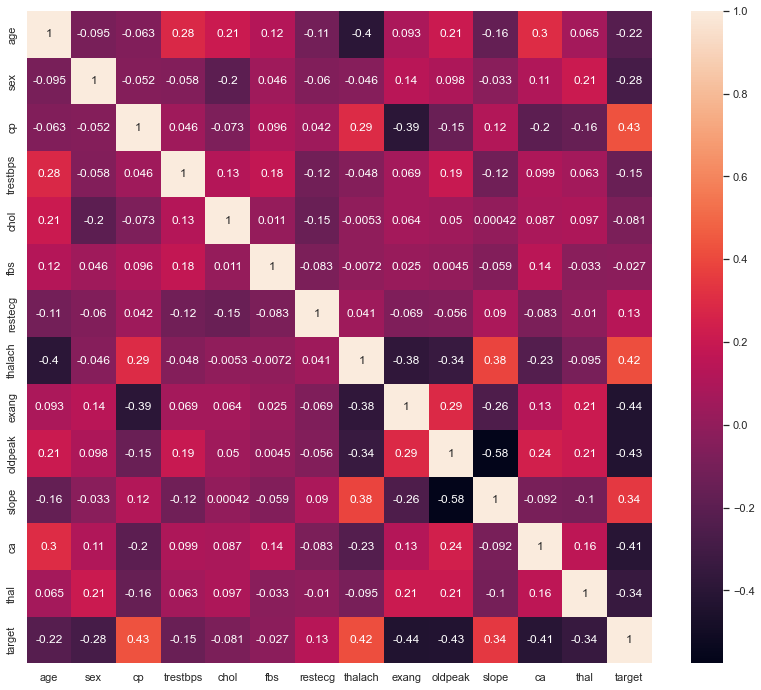

In [53]:
#HeatMap
# #defining size of the picture
sns.set(rc={'figure.figsize':(14,12)})
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot= True)
plt.savefig('heatmap.png', dpi=300)

In [57]:
correlation.sort_values('target')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146
ca,0.302261,0.113060,-0.195356,0.099248,0.086878,0.144935,-0.083112,-0.228311,0.125377,0.236560,-0.092236,1.000000,0.160085,-0.408992
thal,0.065317,0.211452,-0.160370,0.062870,0.096810,-0.032752,-0.010473,-0.094910,0.205826,0.209090,-0.103314,0.160085,1.000000,-0.343101
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874


### Outcomes:
Max correlation: Between Target and CP
Max Negative Correlation: Between Slope and OldPeak

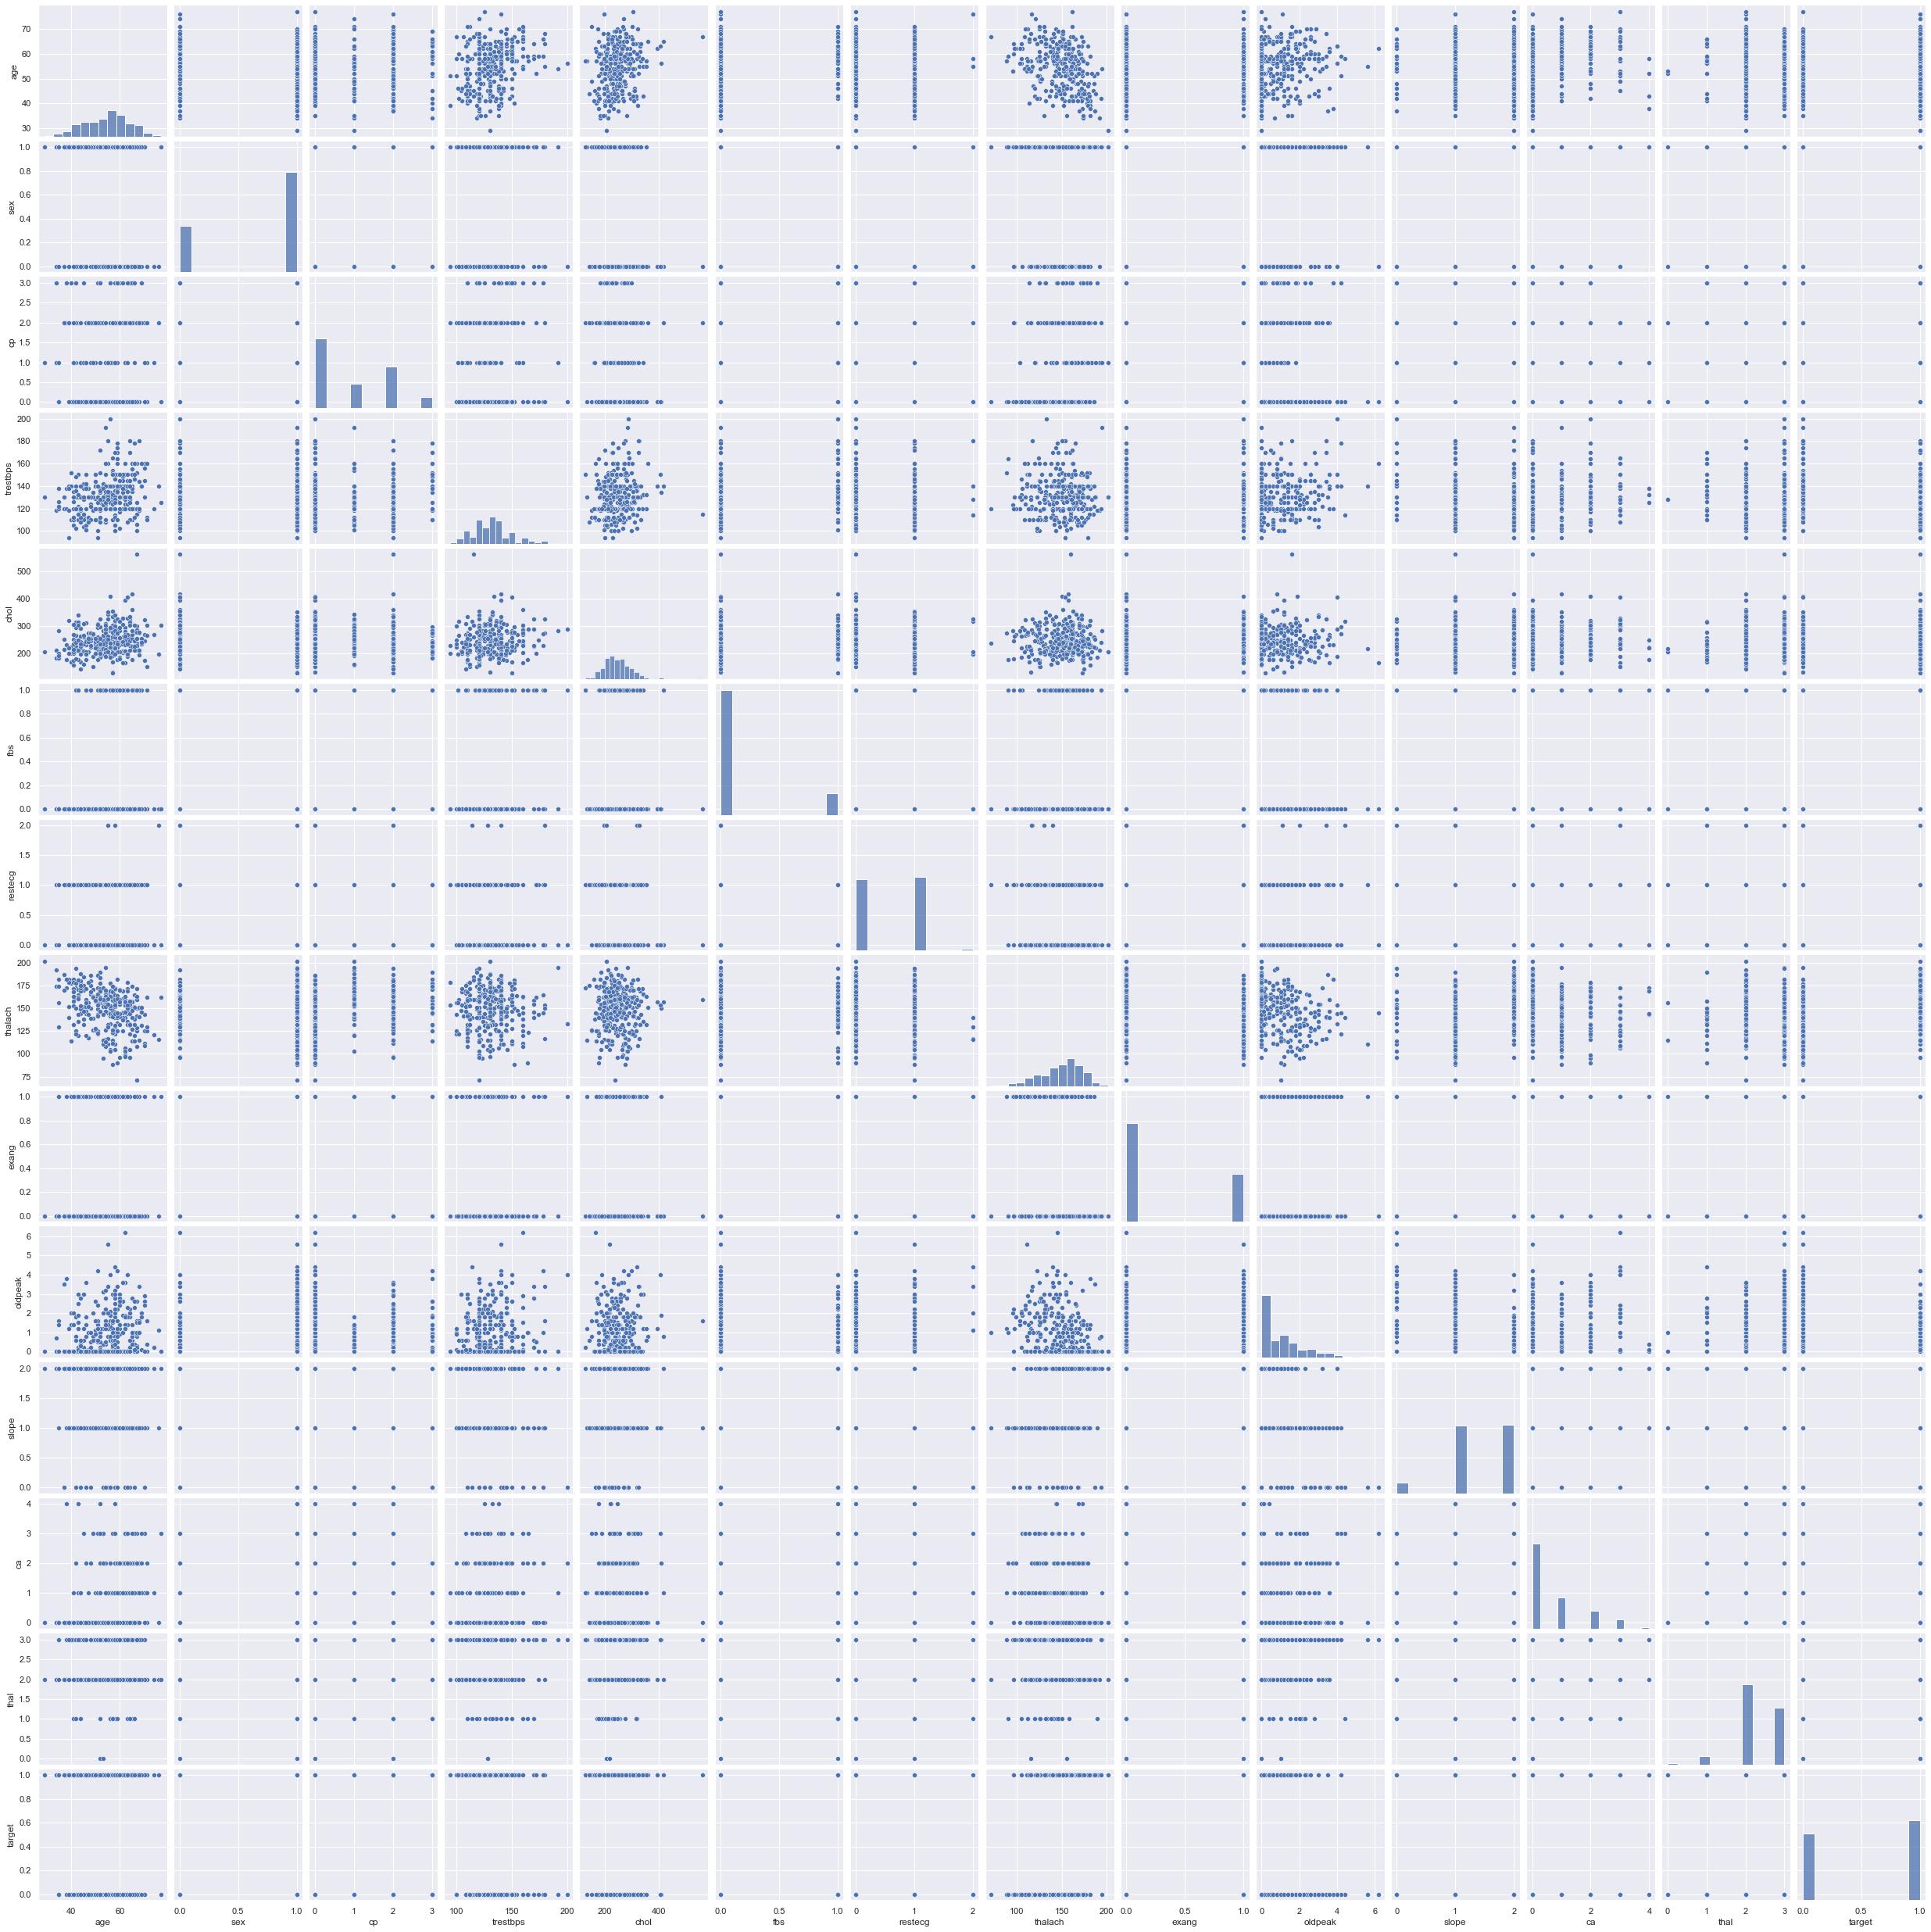

In [64]:
sns.set(rc={'figure.figsize':(14,12)})
sns.pairplot(cleanData)
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')

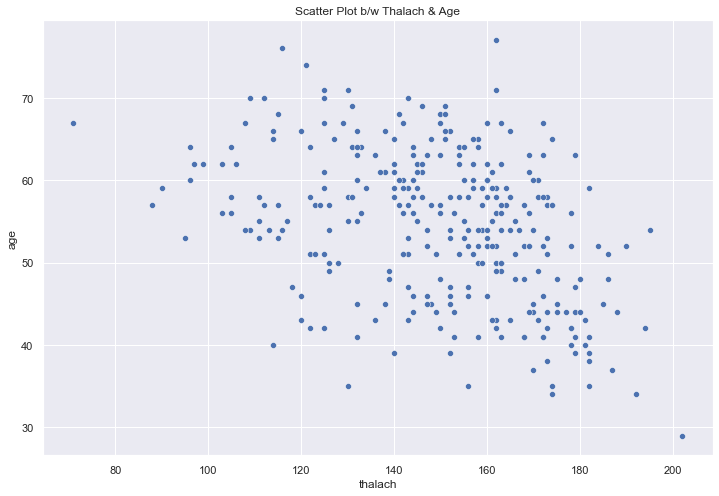

In [67]:
sns.scatterplot(x='thalach',y='age', data= cleanData).set(title='Scatter Plot b/w Thalach & Age')
sns.set(rc={'figure.figsize':(10,6)})
plt.savefig('Thalach_and_Age_scatter_plot.png', dpi=300)

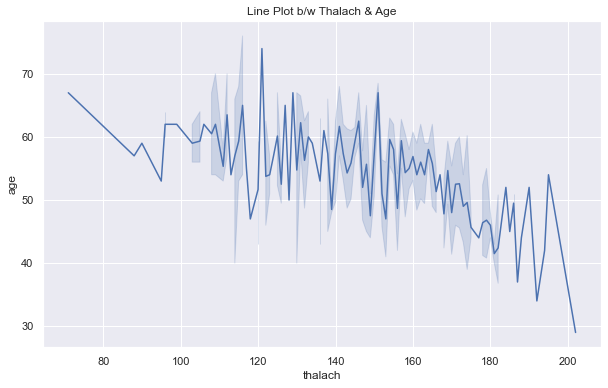

In [71]:
# draw lineplot
sns.lineplot(x="thalach", y="age", data=cleanData).set(title='Line Plot b/w Thalach & Age')
plt.savefig('Thalach_and_Age_Line_plot.png', dpi=300)

### Description:
This scatter plot reflects that age and thalach are in a moderate negative relation. As the value of the age rises the value of thalach decrease. There outliers can be seen in the plot.  

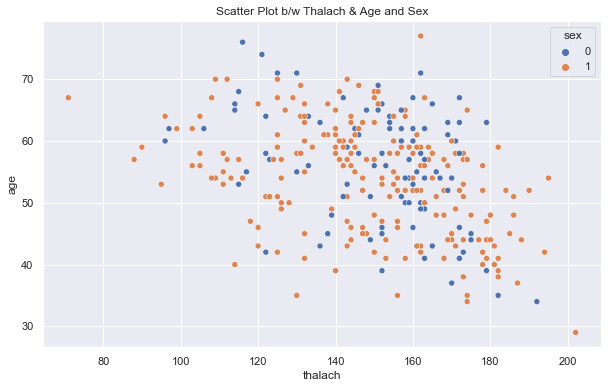

In [73]:
sns.scatterplot(x='thalach',y='age',hue='sex', data= cleanData).set(title='Scatter Plot b/w Thalach & Age and Sex')
# sns.set(rc={'figure.figsize':(10,6)})
plt.savefig('Thalach_Age_and_sex_scatter_plot.png', dpi=300)

## Model Preparation

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics

### KNN Model

In [9]:
def knn(features, label, no_of_variables):
    #Splitting the dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
    # # Get Model
    model = KNeighborsClassifier(n_neighbors=5)
    # Train the model using the training sets
    model.fit(X_train,y_train)
    #Making confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ac  = accuracy_score(y_test, y_pred)
    cm_report = metrics.classification_report(y_test,y_pred)
#     print(cm)
#     print(ac)
    print("Modeling with "+str(no_of_variables)+" features.")
    print(cm_report)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
    cmd.plot(colorbar=False, cmap='Blues')
    # plt.show()
    plt.savefig("confusion_matrix_with"+str(no_of_variables)+"variables.png")

In [10]:
featuresC = cleanData.drop('target', axis=1)
featuresC

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [15]:
# X = np.column_stack((featuresl,targetLabels))

In [11]:
featuresC = featuresC.to_numpy()

In [12]:
featuresC.shape

(302, 13)

#### Testing on clean data

Modeling with 13 features.
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        25
           1       0.64      0.69      0.67        36

    accuracy                           0.59        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.58      0.59      0.59        61



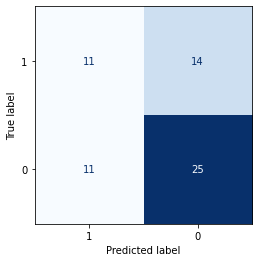

In [13]:
label = np.array(cleanData['target'])
knn(featuresC, label, 13)

#### Testing on noisy data

In [16]:
features = data.drop('target', axis=1)

In [17]:
features = features.to_numpy()
# Separating features and target can also be done as:
# data = pd.read_csv("D://Blogs//train.csv")
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range

Modeling with 13 features.
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        98
           1       0.77      0.74      0.75       107

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



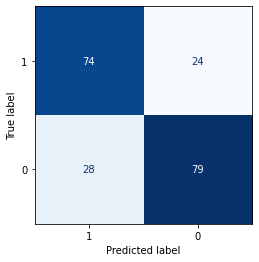

In [18]:
knn(features,data['target'],13)

### Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=1)

#### Testing on clean data

In [20]:
#Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(featuresC, cleanData['target'], test_size=0.2, random_state=0)

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
#Test set
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8360655737704918

#### Testing on noisy (original) data

In [23]:
#Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(features, data['target'], test_size=0.2, random_state=0)
model.fit(X_train, y_train)
#Test set
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

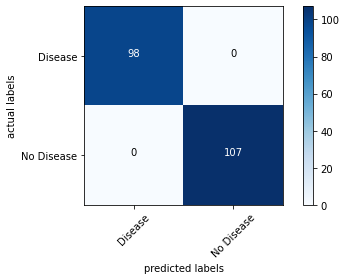

In [24]:
target = ['Disease', 'No Disease']
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
        plt.ylabel('actual labels')
        plt.xlabel('predicted labels')
        plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=[target[0],target[1]])

### 100% Accuracy

## Applying feature selection to improve accuracy of cleaned data

### Feature Importance method

In [25]:
from sklearn.ensemble import RandomForestClassifier
modelt = RandomForestClassifier(n_estimators=500, random_state=1)

In [27]:
#Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(featuresC, cleanData['target'], test_size=0.2, random_state=0)
modelt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [28]:
# checking the features importance
print(modelt.feature_importances_)

[0.09 0.04 0.12 0.08 0.07 0.01 0.02 0.11 0.08 0.13 0.04 0.1  0.12]


fbs         0.010267
restecg     0.021140
sex         0.038256
slope       0.043213
chol        0.070254
trestbps    0.075118
exang       0.078435
age         0.085289
ca          0.103746
thalach     0.109370
cp          0.115936
thal        0.119070
oldpeak     0.129905
dtype: float64


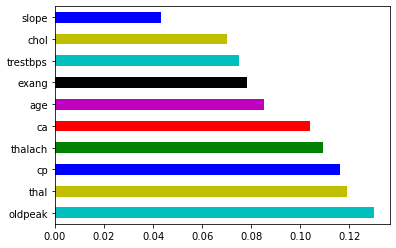

In [50]:
X = cleanData.drop('target',axis=1)
feat_importances = pd.Series(modelt.feature_importances_, index=X.columns)
print(feat_importances.sort_values())
# feat_importances.nlargest(10).plot(kind='barh',color = ['c', 'y','b','g','r','m','k'])
c = ['c', 'y','b','g','r','m','k']
feat_importances.nlargest(10).plot(kind='barh',color = c )
# matplotlib. colors
# b : blue.
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.

plt.show()

In [55]:
feat_importances.nlargest(10)

oldpeak     0.129905
thal        0.119070
cp          0.115936
thalach     0.109370
ca          0.103746
age         0.085289
exang       0.078435
trestbps    0.075118
chol        0.070254
slope       0.043213
dtype: float64

In [79]:
# importantFeatures = cleanData[['oldpeak', 'thal', 'cp', 'thalach','ca','age','exang','trestbps','chol','slope']]
# importantFeatures = cleanData[['oldpeak', 'thal', 'cp', 'thalach','ca','age','exang','trestbps','chol']]
# importantFeatures = cleanData[['oldpeak', 'thal', 'cp', 'thalach','ca','age','exang','trestbps']]
importantFeatures = cleanData[['oldpeak', 'thal', 'cp', 'thalach','ca','age','exang','trestbps','slope']]

In [80]:
# cleanData
importantFeatures

,oldpeak,thal,cp,thalach,ca,age,exang,trestbps,slope
0,1.0,3,0,168,2,52,0,125,2
1,3.1,3,0,155,0,53,1,140,0
2,2.6,3,0,125,0,70,1,145,0
3,0.0,3,0,161,1,61,0,148,2
4,1.9,2,0,106,3,62,0,138,1
...,...,...,...,...,...,...,...,...,...
723,1.5,2,2,115,0,68,0,120,1
733,0.6,2,2,175,0,44,0,108,1
739,0.0,3,0,161,1,52,1,128,2
843,0.0,2,3,125,0,59,0,160,2


In [81]:
#Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(importantFeatures, cleanData['target'], test_size=0.2, random_state=0)
modelt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [82]:
#Test set
y_pred = modelt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8524590163934426

### Model Accuracy has increased by 2%.